#About the dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

* Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
* Survived_1_year == 1, implies that the patient survived after 1 year of treatment

Data Description:

* ID_Patient_Care_Situation: Care situation of a patient during treatment
Diagnosed_Condition: The diagnosed condition of the patient
* ID_Patient: Patient identifier number
* Treatment_with_drugs: Class of drugs used during treatment
* Patient_Age: Age of the patient
* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
* Patient_Smoker: If the patient was a smoker or not
* Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
* Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Target
* Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [251]:
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

HTTPError: ignored

In [187]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [188]:
df.tail()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
23096,3947,21,6266,DX6,50,18.391156,YES,RURAL,Stable,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0


remove unused columns

In [189]:
df = df.drop(['ID_Patient_Care_Situation', 'Patient_ID'], axis=1)
test_df = test_df.drop(['ID_Patient_Care_Situation', 'Patient_ID'], axis=1)

In [190]:
df.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,26.413127,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,15.030865,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,0.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,39.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,52.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       23097 non-null  int64  
 1   Treated_with_drugs        23084 non-null  object 
 2   Patient_Age               23097 non-null  int64  
 3   Patient_Body_Mass_Index   23097 non-null  float64
 4   Patient_Smoker            23097 non-null  object 
 5   Patient_Rural_Urban       23097 non-null  object 
 6   Patient_mental_condition  23097 non-null  object 
 7   A                         21862 non-null  float64
 8   B                         21862 non-null  float64
 9   C                         21862 non-null  float64
 10  D                         21862 non-null  float64
 11  E                         21862 non-null  float64
 12  F                         21862 non-null  float64
 13  Z                         21862 non-null  float64
 14  Number

Some missing values

### Data Visualization

check unique values

In [192]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print(100 * '-')

Diagnosed_Condition
11    489
12    483
49    479
7     471
52    469
43    469
18    468
36    466
17    461
40    460
8     460
1     459
24    458
34    458
19    456
45    455
5     454
21    454
29    452
46    448
41    447
35    447
51    444
30    443
6     443
33    443
4     443
23    443
31    443
39    442
3     442
16    440
20    439
9     438
22    436
15    436
13    436
27    434
44    432
25    429
28    426
37    425
32    425
42    423
47    422
26    421
48    418
2     417
10    416
38    413
14    408
50    401
0      13
Name: Diagnosed_Condition, dtype: int64
----------------------------------------------------------------------------------------------------
Treated_with_drugs
DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423


Check missing values

In [193]:
m_df = df[df.isnull().any(axis=1)]
m_df

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,0,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
27,31,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,28,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,24,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,13,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,3,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,48,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,6,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,30,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [194]:
for col in m_df.columns:
    print(col)
    print(m_df[col].value_counts(dropna=False))
    print(100 * '-')

Diagnosed_Condition
29    38
12    35
11    34
45    34
51    34
35    31
52    31
46    30
18    30
21    29
47    28
24    28
1     26
10    26
13    26
19    26
22    26
26    26
36    26
27    25
17    24
43    24
15    24
38    24
37    24
39    24
28    23
33    23
49    23
30    23
2     22
3     22
48    22
23    21
5     21
8     21
7     21
16    20
31    20
44    20
40    19
32    19
9     18
41    18
42    18
14    17
20    17
25    16
4     16
34    15
6     15
0     13
50    12
Name: Diagnosed_Condition, dtype: int64
----------------------------------------------------------------------------------------------------
Treated_with_drugs
DX6                 458
DX2                 102
DX5                  97
DX4                  95
DX3                  89
DX1                  88
DX3 DX5              29
DX2 DX5              29
DX1 DX3              27
DX1 DX2              26
DX2 DX4              25
DX1 DX4              23
DX3 DX4              22
DX4 DX5              21
DX1 DX5

hmm let's see missing values at treated_with_drugs

In [195]:
df[df['Treated_with_drugs'].isnull()]

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,0,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,0,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,0,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,0,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,0,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,0,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,0,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,0,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,0,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,0,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


other column values from treated with drugs missing values seems to be outliers and very small part data (13 from 20000) so it's better to remove these data

In [196]:
c_df = df.dropna(subset=['Treated_with_drugs']).reset_index(drop=True)
c_df

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,45,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,3,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23080,41,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23081,24,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23082,11,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


let's check unique values again

In [197]:
for col in c_df.columns:
    print(col)
    print(c_df[col].value_counts(dropna=False))
    print(100 * '-')

Diagnosed_Condition
11    489
12    483
49    479
7     471
52    469
43    469
18    468
36    466
17    461
8     460
40    460
1     459
24    458
34    458
19    456
45    455
5     454
21    454
29    452
46    448
35    447
41    447
51    444
4     443
33    443
23    443
31    443
30    443
6     443
39    442
3     442
16    440
20    439
9     438
22    436
15    436
13    436
27    434
44    432
25    429
28    426
32    425
37    425
42    423
47    422
26    421
48    418
2     417
10    416
38    413
14    408
50    401
Name: Diagnosed_Condition, dtype: int64
----------------------------------------------------------------------------------------------------
Treated_with_drugs
DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4   

let's see Z column because only NaN and 0 in training, also patient mental only contain stable value

In [198]:
test_df.Z.value_counts()

0.0    9303
Name: Z, dtype: int64

In [199]:
# remove Z and patient mental column
c_df = c_df.drop(['Z', 'Patient_mental_condition'], axis=1)
test_df = test_df.drop(['Z', 'Patient_mental_condition'], axis=1)

see Prev condition missing values

In [200]:
c_df[c_df['Number_of_prev_cond'].isnull()]

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
26,31,DX2,44,27.935658,YES,URBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
35,28,DX1,4,17.342624,NO,URBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
40,24,DX2 DX5,12,20.994843,NO,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
96,13,DX2,49,26.641499,NO,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
104,44,DX4,41,28.079769,YES,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,3,DX2,26,26.548517,YES,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22999,48,DX4,15,18.849124,NO,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23011,6,DX2,13,24.343030,NO,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23025,30,DX3 DX5,45,19.272509,NO,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [201]:
# fillna with 0, means no prev condition
c_df = c_df.fillna(0)

In [202]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23084 non-null  int64  
 1   Treated_with_drugs       23084 non-null  object 
 2   Patient_Age              23084 non-null  int64  
 3   Patient_Body_Mass_Index  23084 non-null  float64
 4   Patient_Smoker           23084 non-null  object 
 5   Patient_Rural_Urban      23084 non-null  object 
 6   A                        23084 non-null  float64
 7   B                        23084 non-null  float64
 8   C                        23084 non-null  float64
 9   D                        23084 non-null  float64
 10  E                        23084 non-null  float64
 11  F                        23084 non-null  float64
 12  Number_of_prev_cond      23084 non-null  float64
 13  Survived_1_year          23084 non-null  int64  
dtypes: float64(8), int64(3

In [203]:
c_df.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
count,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000
mean,26.428002,33.156862,23.467172,0.850373,0.129137,0.175273,0.079189,0.372422,0.050858,1.657252,0.632040
std,15.022018,19.425696,3.772969,0.356714,0.335359,0.380209,0.270039,0.483461,0.219712,0.846699,0.482261
min,1.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,16.000000,20.209666,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,33.000000,23.387824,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,39.000000,50.000000,26.788780,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,52.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


No missing values

### Data Preparation

Encode categorical

#####Treated_with_drugs -> one hot encoded
#####other categorical -> labeling

In [204]:
# reset index for easier processing
c_df = c_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [205]:
# label encoding
c_df['Patient_Smoker'] = c_df['Patient_Smoker'].map({'YES': 1, 'NO': 0})
c_df['Patient_Rural_Urban'] = c_df['Patient_Rural_Urban'].map({'RURAL': 0, 'URBAN': 1})

test_df['Patient_Smoker'] = test_df['Patient_Smoker'].map({'YES': 1, 'NO': 0})
test_df['Patient_Rural_Urban'] = test_df['Patient_Rural_Urban'].map({'RURAL': 0, 'URBAN': 1})

In [206]:
# one hot encoding
train_drugs = {
    'DX1': [], 
    'DX2': [],
    'DX3': [],
    'DX4': [],
    'DX5': [],
    'DX6': []
}

test_drugs = {
    'DX1': [], 
    'DX2': [],
    'DX3': [],
    'DX4': [],
    'DX5': [],
    'DX6': []
}

drug_list = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']

In [207]:
for d in c_df['Treated_with_drugs'].values:
    drug_used = d.split(' ')
    for drug in drug_list:
        if drug in drug_used:
            train_drugs[drug].append(1)
        else:
            train_drugs[drug].append(0)

In [208]:
for d in test_df['Treated_with_drugs'].values:
    drug_used = d.split(' ')
    for drug in drug_list:
        if drug in drug_used:
            test_drugs[drug].append(1)
        else:
            test_drugs[drug].append(0)

In [209]:
for drug in drug_list:
    c_df[drug] = train_drugs[drug]
    test_df[drug] = test_drugs[drug]

In [210]:
c_df = c_df.drop(['Treated_with_drugs'], axis=1)
test_df = test_df.drop(['Treated_with_drugs'], axis=1)

Train / Validation Split

In [211]:
X = c_df.drop(['Survived_1_year'], axis=1).values
y = c_df['Survived_1_year'].values

X_test_pred = test_df.values

In [212]:
X_test.shape

(5771, 18)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [215]:
X_train.shape

(17313, 18)

Scale data

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test_pred = scaler.transform(X_test_pred)

### Model train

In [218]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree, plot_importance

In [219]:
dt = DecisionTreeClassifier()
# svc = SVC(probability=True)
ada_dt = AdaBoostClassifier(base_estimator=dt)
# ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, oob_score=True, n_jobs=-1)

In [220]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [221]:
# svc.fit(X_train, y_train)

In [222]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [223]:
# ada_svc.fit(X_train, y_train)

In [224]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [225]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [226]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

### Model Evaluation

In [243]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

In [228]:
y_pred_dt = dt.predict(X_test)
# y_pred_svc = svc.predict(X_test)
y_pred_ada_dt = ada_dt.predict(X_test)
# y_pred_ada_svc = ada_svc.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [229]:
def plot_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(16, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5)
    plt.title(title)
    plt.show()

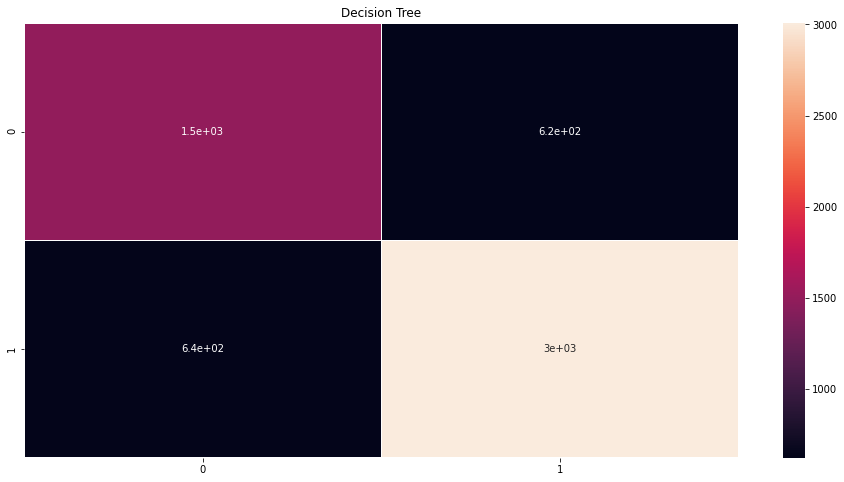

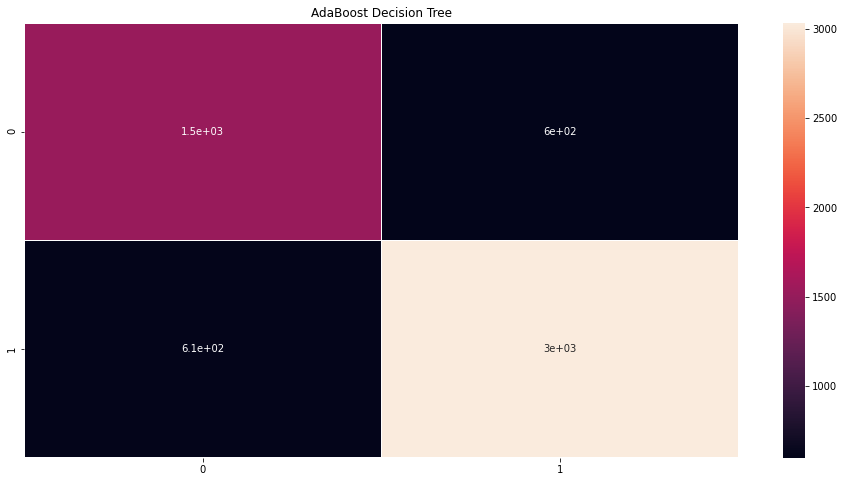

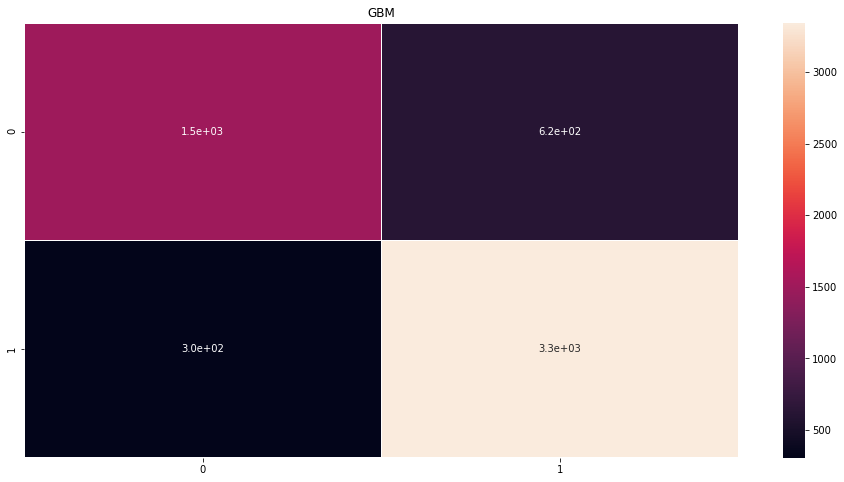

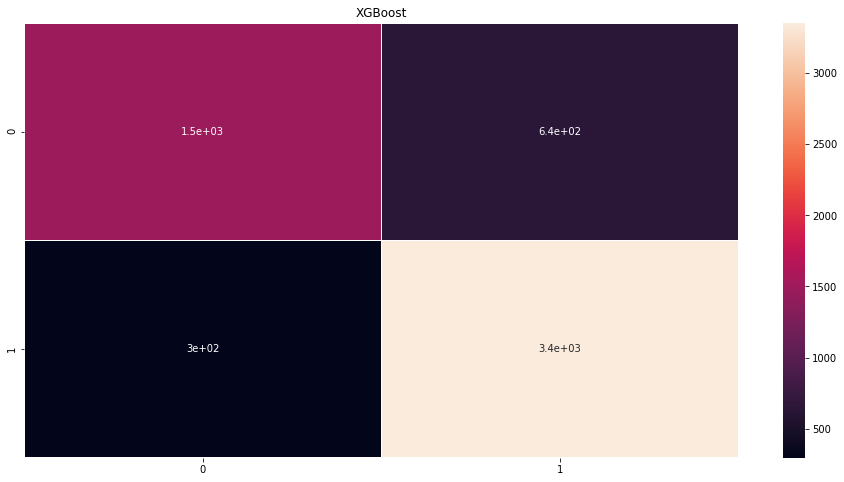

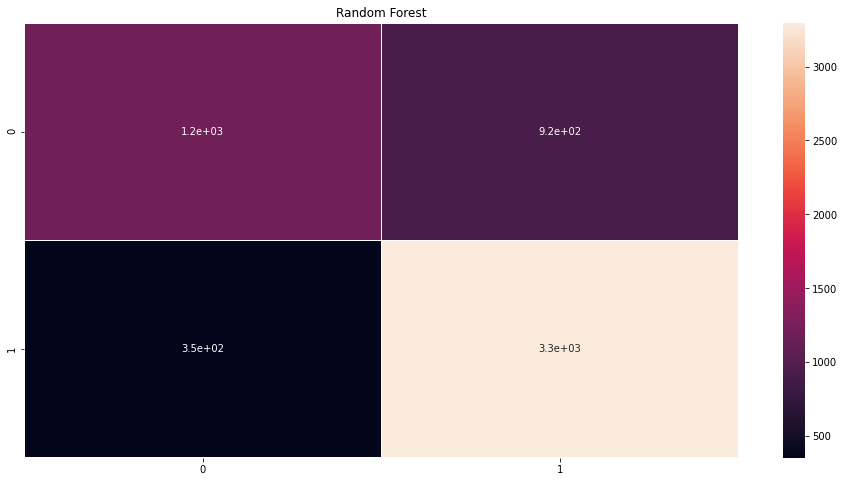

In [230]:
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
# plot_confusion_matrix(y_test, y_pred_svc, 'SVC')
plot_confusion_matrix(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
# plot_confusion_matrix(y_test, y_pred_ada_svc, 'AdaBoost SVC')
plot_confusion_matrix(y_test, y_pred_gbm, 'GBM')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

In [231]:
def print_classification_report(y_test, y_pred, title):
    print(title)
    print(classification_report(y_test, y_pred))
    print(100*'-')

In [232]:
print_classification_report(y_test, y_pred_dt, 'Decision Tree')
# print_classification_report(y_test, y_pred_svc, 'SVC')
print_classification_report(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
# print_classification_report(y_test, y_pred_ada_svc, 'AdaBoost SVC')
print_classification_report(y_test, y_pred_gbm, 'GBM')
print_classification_report(y_test, y_pred_xgb, 'XGBoost')
print_classification_report(y_test, y_pred_rf, 'Random Forest')

Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2123
           1       0.83      0.82      0.83      3648

    accuracy                           0.78      5771
   macro avg       0.76      0.77      0.76      5771
weighted avg       0.78      0.78      0.78      5771

----------------------------------------------------------------------------------------------------
AdaBoost Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      2123
           1       0.84      0.83      0.83      3648

    accuracy                           0.79      5771
   macro avg       0.77      0.78      0.77      5771
weighted avg       0.79      0.79      0.79      5771

----------------------------------------------------------------------------------------------------
GBM
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     

In [233]:
acc = [dt.score(X_test, y_test),
    #    svc.score(X_test, y_test),
       ada_dt.score(X_test, y_test),
    #    ada_svc.score(X_test, y_test),
       gbm.score(X_test, y_test),
       xgb.score(X_test, y_test),
       rf.score(X_test, y_test)
]
# label = ['DT', 'SVC', 'AdaDT', 'AdaSVC', 'GBM', 'XGB', 'RF']
label = ['DT', 'AdaDT', 'GBM', 'XGB', 'RF']
idx = np.arange(len(label))

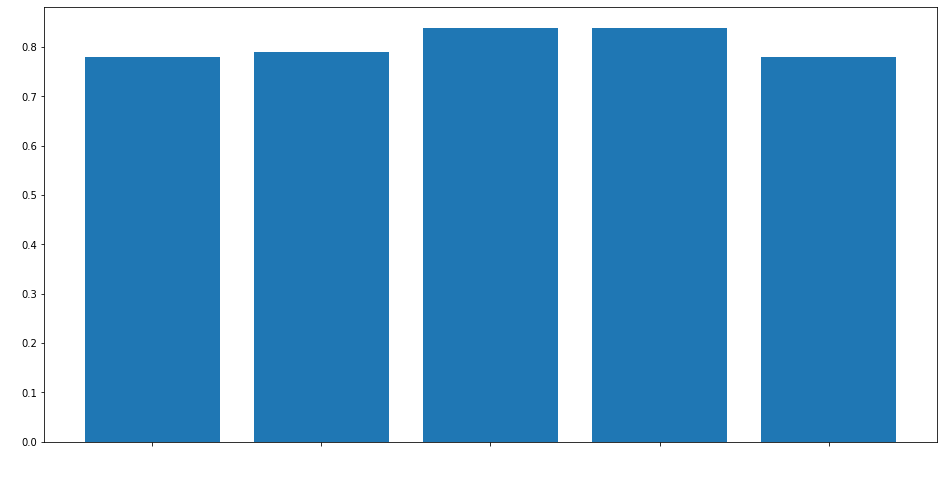

In [234]:
plt.figure(figsize=(16, 8))
plt.bar(idx, acc)
plt.xticks(idx, label, rotation=90, c='w')
plt.xlabel('Model', c='w')
plt.ylabel('Accuracy', c='w')
plt.show()

In [244]:
f1_scores = [f1_score(dt.predict(X_test), y_test)),
    #    svc.score(X_test, y_test),
       f1_score(ada_dt.predict(X_test), y_test)),
    #    ada_svc.score(X_test, y_test),
       f1_score(gbm.predict(X_test), y_test)),
       f1_score(xgb.predict(X_test), y_test)),
       f1_score(rf.predict(X_test), y_test))
]
# label = ['DT', 'SVC', 'AdaDT', 'AdaSVC', 'GBM', 'XGB', 'RF']
label = ['DT', 'AdaDT', 'GBM', 'XGB', 'RF']
idx = np.arange(len(label))

SyntaxError: ignored

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(idx, f1_scores)
plt.xticks(idx, label, rotation=90, c='w')
plt.xlabel('Model', c='w')
plt.ylabel('f1_score', c='w')
plt.show()

### Feature Importance

Example of feature importances visualization

In [235]:
print(xgb.feature_importances_)

[0.07333624 0.06506697 0.08740781 0.09853151 0.06464736 0.05900145
 0.02354211 0.11848772 0.04766626 0.         0.         0.02754815
 0.02375711 0.00906519 0.02793738 0.03927534 0.04222525 0.1925041 ]


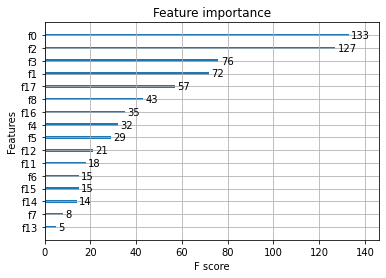

In [236]:
plot_importance(xgb)

Feature Selection

In [237]:
def feature_importances_performance(model, new_model, model_name, X_train, X_test, y_train, y_test):
    print(model_name)
    feature_imp = sorted(model.feature_importances_)

    for threshold in feature_imp:
        selection = SelectFromModel(model, threshold=threshold, prefit=True)

        selected_feature_X_train = selection.transform(X_train)
        new_model.fit(selected_feature_X_train, y_train)

        selected_feature_X_test = selection.transform(X_test)
        y_pred = new_model.predict(selected_feature_X_test)

        acc = accuracy_score(y_test, y_pred)

        print(f'Threshold={threshold:.5f}, Number of features={selected_feature_X_train.shape[1]}, Model Accuracy: {acc:.3f}')
    print(100*'-')

In [238]:
feature_importances_performance(dt, DecisionTreeClassifier(), 'Decision Tree', X_train, X_test, y_train, y_test)
# feature_importances_performance(svc, SVC(probability=True), 'SVC', X_train, X_test, y_train, y_test)
feature_importances_performance(ada_dt, AdaBoostClassifier(base_estimator=dt), 'AdaBoost Decision Tree', X_train, X_test, y_train, y_test)
# feature_importances_performance(ada_svc, AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3), 'AdaBoost SVC', X_train, X_test, y_train, y_test)
feature_importances_performance(gbm, GradientBoostingClassifier(), 'GradientBoosting', X_train, X_test, y_train, y_test)
feature_importances_performance(xgb, XGBClassifier(), 'XGBoost', X_train, X_test, y_train, y_test)
feature_importances_performance(rf, RandomForestClassifier(), 'Random Forest', X_train, X_test, y_train, y_test)

Decision Tree
Threshold=0.00416, Number of features=18, Model Accuracy: 0.778
Threshold=0.00962, Number of features=17, Model Accuracy: 0.781
Threshold=0.01026, Number of features=16, Model Accuracy: 0.776
Threshold=0.01120, Number of features=15, Model Accuracy: 0.771
Threshold=0.01133, Number of features=14, Model Accuracy: 0.780
Threshold=0.01143, Number of features=13, Model Accuracy: 0.778
Threshold=0.01552, Number of features=12, Model Accuracy: 0.774
Threshold=0.01681, Number of features=11, Model Accuracy: 0.779
Threshold=0.01720, Number of features=10, Model Accuracy: 0.778
Threshold=0.02161, Number of features=9, Model Accuracy: 0.768
Threshold=0.02604, Number of features=8, Model Accuracy: 0.758
Threshold=0.03044, Number of features=7, Model Accuracy: 0.755
Threshold=0.03124, Number of features=6, Model Accuracy: 0.747
Threshold=0.07617, Number of features=5, Model Accuracy: 0.733
Threshold=0.10870, Number of features=4, Model Accuracy: 0.684
Threshold=0.13987, Number of fea

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.789


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.791


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.796


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.790


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00036, Number of features=16, Model Accuracy: 0.787


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.787


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.789


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00014, Number of features=18, Model Accuracy: 0.787


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.789


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00034, Number of features=17, Model Accuracy: 0.795


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00038, Number of features=15, Model Accuracy: 0.791


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00047, Number of features=14, Model Accuracy: 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00067, Number of features=13, Model Accuracy: 0.793


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=0.00067, Number of features=12, Model Accuracy: 0.770


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:187: RuntimeWarning: invalid value encountered in less
  mask[scores < threshold] = False


Threshold=nan, Number of features=18, Model Accuracy: 0.793
----------------------------------------------------------------------------------------------------
GradientBoosting
Threshold=0.00000, Number of features=18, Model Accuracy: 0.840
Threshold=0.00000, Number of features=18, Model Accuracy: 0.840
Threshold=0.00068, Number of features=16, Model Accuracy: 0.840
Threshold=0.00328, Number of features=15, Model Accuracy: 0.841
Threshold=0.00346, Number of features=14, Model Accuracy: 0.835
Threshold=0.00738, Number of features=13, Model Accuracy: 0.837
Threshold=0.00750, Number of features=12, Model Accuracy: 0.834
Threshold=0.00965, Number of features=11, Model Accuracy: 0.833
Threshold=0.01268, Number of features=10, Model Accuracy: 0.831
Threshold=0.02458, Number of features=9, Model Accuracy: 0.830
Threshold=0.03456, Number of features=8, Model Accuracy: 0.825
Threshold=0.03753, Number of features=7, Model Accuracy: 0.819
Threshold=0.03860, Number of features=6, Model Accuracy: 

Cross Validation Performances

In [239]:
kfold = KFold(n_splits=40)
cv_dt = DecisionTreeClassifier()
# cv_svc = SVC(probability=True)
cv_ada_dt = AdaBoostClassifier(base_estimator=dt)
# cv_ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
cv_gbm = GradientBoostingClassifier()
cv_xgb = XGBClassifier()
cv_rf = RandomForestClassifier()

cv_r_dt = cross_val_score(cv_dt, X_train, y_train, cv=kfold, verbose=True)
# cv_r_svc = cross_val_score(cv_svc, X_train, y_train, cv=kfold, verbose=True)
cv_r_ada_dt = cross_val_score(cv_ada_dt, X_train, y_train, cv=kfold, verbose=True)
# cv_r_ada_svc = cross_val_score(cv_ada_svc, X_train, y_train, cv=kfold, verbose=True)
cv_r_gbm = cross_val_score(cv_gbm, X_train, y_train, cv=kfold, verbose=True)
cv_r_xgb = cross_val_score(cv_xgb, X_train, y_train, cv=kfold, verbose=True)
cv_r_rf = cross_val_score(cv_rf, X_train, y_train, cv=kfold, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   43.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


In [240]:
print("DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_dt.mean()*100, cv_r_dt.std()*100))
# print("SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_svc.mean()*100, cv_r_svc.std()*100))
print("AdaBoost DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_ada_dt.mean()*100, cv_r_ada_dt.std()*100))
# print("AdaBoost SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_ada_svc.mean()*100, cv_r_ada_svc.std()*100))
print("GBM Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_gbm.mean()*100, cv_r_gbm.std()*100))
print("XGB Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_xgb.mean()*100, cv_r_xgb.std()*100))
print("Random Forest Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_rf.mean()*100, cv_r_rf.std()*100))

DT Mean Accuracy: 77.39%  Standard Deviation 1.81%
AdaBoost DT Mean Accuracy: 78.60%  Standard Deviation 1.70%
GBM Mean Accuracy: 82.99%  Standard Deviation 1.91%
XGB Mean Accuracy: 83.09%  Standard Deviation 1.75%
Random Forest Mean Accuracy: 81.70%  Standard Deviation 1.83%


In [241]:
sfold = StratifiedKFold(n_splits=40)
cv_dt = DecisionTreeClassifier()
# cv_svc = SVC(probability=True)
cv_ada_dt = AdaBoostClassifier(base_estimator=dt)
# cv_ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
cv_gbm = GradientBoostingClassifier()
cv_xgb = XGBClassifier()
cv_rf = RandomForestClassifier()

scv_r_dt = cross_val_score(cv_dt, X_train, y_train, cv=sfold, verbose=True)
# scv_r_svc = cross_val_score(cv_svc, X_train, y_train, cv=sfold, verbose=True)
scv_r_ada_dt = cross_val_score(cv_ada_dt, X_train, y_train, cv=sfold, verbose=True)
# scv_r_ada_svc = cross_val_score(cv_ada_svc, X_train, y_train, cv=sfold, verbose=True)
scv_r_gbm = cross_val_score(cv_gbm, X_train, y_train, cv=sfold, verbose=True)
scv_r_xgb = cross_val_score(cv_xgb, X_train, y_train, cv=sfold, verbose=True)
scv_r_rf = cross_val_score(cv_rf, X_train, y_train, cv=sfold, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   43.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


In [242]:
print("DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_dt.mean()*100, scv_r_dt.std()*100))
# print("SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_svc.mean()*100, scv_r_svc.std()*100))
print("AdaBoost DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_ada_dt.mean()*100, scv_r_ada_dt.std()*100))
# print("AdaBoost SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_ada_svc.mean()*100, scv_r_ada_svc.std()*100))
print("GBM Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_gbm.mean()*100, scv_r_gbm.std()*100))
print("XGB Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_xgb.mean()*100, scv_r_xgb.std()*100))
print("Random Forest Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_rf.mean()*100, scv_r_rf.std()*100))

DT Mean Accuracy: 77.28%  Standard Deviation 1.92%
AdaBoost DT Mean Accuracy: 78.68%  Standard Deviation 1.65%
GBM Mean Accuracy: 82.99%  Standard Deviation 1.65%
XGB Mean Accuracy: 82.97%  Standard Deviation 1.65%
Random Forest Mean Accuracy: 81.76%  Standard Deviation 1.74%


### Predictions

Best model seems to be gbm

In [247]:
y_pred = gbm.predict(X_test_pred)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [249]:
result = pd.DataFrame({
    'prediction': y_pred
})
result.to_csv('sap_pred.csv', index=False)